# Introduction to Python for People with Programming Experience


## Session 2 / 4 - 27.09.2022 9:00 - 13:00

*by Fabian Wilde, Katharina Hoff, Matthis Ebel, Mario Stanke & Felix Becker*

Contact: felix.becker@uni-greifswald.de

<br><br><br>
## List Comprehensions and Generators
<br>
For-loops in Python very often do not contain complicated code blocks. In fact, the most frequent use case is just to apply a certain function or formula to every element e.g. in a list and store the result somewhere.<br><br>
A very elegant (and also faster way) to avoid for-loops in Python in those cases is to use so-called <a href="https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions"><i><b>list comprehensions</b></i></a>.<br><br>
<b>A list comprehension in Python is defined by</b><br><br>

<font face="Courier"><b>a = [ <i>output_expression</i> for elem in x]</b></font>

Note that you could achieve the same result e.g. with `append` and a `for loop`. However, you will notice that your code is written faster and more readable and will likely use list comprehension on a daily basis in your future Python career once you get familiar.

**We can also generate elements conditionally:**

<font face="Courier"><b>a = [ <i>out_expr</i> if <i>condition</i> else <i>alt_out_expr</i> for elem in x]</b><br>
</font>
<br>
    where <i>out_expr</i> and <i>alt_out_expr</i> are expressions (which should include elem) to be evaluated. This could be anything from <font face="Courier">1+1</font> to any function call (with the element as argument). <i>condition</i> is then a Python expression returning a boolean (True/False value) as for "normal" if-elif-else statements in Python.
</font>

### Example 1:

In [4]:
# Generate a list of ascending numbers
x = list(range(10))      # define elements to work on
print("x =", x)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


The range function yields a generator (an iterable) where the new/next value is generated on-the-fly 
on each iteration. In order to get a full list of the numbers, enclose it with the list constructor,
forcing the range generator to be executed.

(If you do not understand this, that's okay for the moment.)

In [9]:
# define a lambda expression that squares a number
sqr = lambda x: x**2

Assume you want to apply `sqr` to all elements in `x`. You already learned how to do this with a for loop:

In [10]:
# create empty list to store the result
y = []
for elem in x:
    # evaluates function sqr with elem as argument and adds the result to the list y
    y.append(sqr(elem))
print("y =", str(y))

y = [0.2024957801586122, 0.39109905891033525, 0.041555512503723906, 0.05617997656574931, 0.14954094453599365, 0.09800565176443038, 0.12652079204606917, 0.8622930232125879, 0.12656858832604034, 0.23831131504226444]


A better way to express this using a list comprehension is:

In [17]:
y = [parabola(elem) for elem in x]
print("y =", str(y))

y = [0.043805256274696815, 0.3461202946187151, 0.5582755941960021, 0.08949348429237301, 0.8638371075074366, 0.09622635175456845, 0.5476366479674368, 0.5894166865239231, 0.02291489001295652, 0.3824019146695927]


### Example 2

In [18]:
#when printed, the list y is not very readable
#one could use a list comprehension to generate a list of strings with less digits right of the comma

def print_nice(y):
    return ["%.3f" % elem for elem in y]

print("rounded y=", print_nice(y))

rounded y= ['0.044', '0.346', '0.558', '0.089', '0.864', '0.096', '0.548', '0.589', '0.023', '0.382']


Here the expression `"%.3f" % elem` converts the float `elem` to a string after rounding to 3 digits after the comma.

### Example 3

In [19]:
# Example 2: conditionally generate a list of values

# import numpy module to use numpy functions
# it is sufficent to import it once in any cell, typically at the start of a notebook
import numpy as np

# create list with 10 random values in [0, 1)
x = np.random.uniform(0,1,(10,))
y = [1 if elem >= 0.5 else 0 for elem in x]
print("x =", print_nice(x)) 
print("y =", y)

x = ['0.940', '0.051', '0.808', '0.352', '0.908', '0.559', '0.638', '0.734', '0.556', '0.199']
y = [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]




<div class="alert alert-block alert-success"><b>Exercise:</b> Try it yourself: In the following cell, generate a list 
    <ol type="1">
        <li>containing the lengths of all elements in `strings` without using a loop.</li>
        <li>containing the first letters of each string.</li>
        <li>containing a tuple for each string that contains the index of the string in the list (e.g. 1 for "Adam") and the last letter of the string.</li>
        <li>of lists such that two consecutive elements of `strings` are packed into their own sublist (i.e. [["Jenny", "Adam"], ["tea", "apple"], ...]
        <li>containing only the strings that start with "A" or "a".
    </ol>
</div>

Tip: For task 3. you could use Python's `zip` (https://docs.python.org/3/library/functions.html#zip) function. Also check out `enumerate` (https://docs.python.org/3/library/functions.html#enumerate).

In [14]:
strings = ["Jenny", "Adam", "tea", "apple", "keyboard", "computer"]

#YOUR CODE HERE

<font size="3">
<b>We can also define our own generators using round brackets instead of square brackets for a list comprehension:</b>
</font>

In [30]:
# create list with 10 random values in [0, 1)
x = np.random.uniform(0,1,(10,))
print("x =", print_nice(x)) 

#define a generator 
y = (1 if elem >= 0.5 else 0 for elem in x)
print(y)

x = ['0.795', '0.969', '0.485', '0.623', '0.695', '0.218', '0.593', '0.812', '0.888', '0.375']
<generator object <genexpr> at 0x7fd22de0eba0>


<font size="3">
In fact, y now does not contain a list with values, but yields a generator object. We still get the same result as before for the list comprehension, if the generator object is used as argument for the constructor of a list (object):
</font>

In [31]:
list(y)

[1, 1, 0, 1, 1, 0, 1, 1, 1, 0]

In [32]:
# or use the generator (like range) in a for loop
y = (1 if elem >= 0.5 else 0 for elem in x)
for elem in y:
    print(elem)

1
1
0
1
1
0
1
1
1
0


<font size="3">
The generator object lazily generates a new value at each iteration and not in advance:
</font>

In [33]:
#redefining the generator
y = (1 if elem >= 0.5 else 0 for elem in x)
iter_count = 0

In [35]:
# the elements of the list y are generated on-the-fly
# the generator yields the next element by invoking the (private / hidden) method
# of the generator object

# evaluate same cell with CTRL + ENTER
# counter increments, the generator yields a new value at each iteration
print("iter:"+str(iter_count))
print(y.__next__())
iter_count += 1

iter:1
1


<div class="alert alert-block alert-success"><b>Exercise:</b> Define a function that generates a list of random integers and decide for each of the numbers if the number is even or odd. As output for each number, we want a string "even" or "odd". <b>Solve the problem with a for-loop and a list comprehension seperately and compare the required time.</b><br><br>
    <b>Hint:</b> Use the function <a href="https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html"><b>np.random.randint</b></a> to generate random integers. Prior using that function, import numpy with <i>import numpy as np</i>. Use the module <a href="https://docs.python.org/3/library/timeit.html">timeit</a> and wrap it around your function to benchmark it. You can also use the function time from the module <a href="https://docs.python.org/3/library/time.html">time</a> to get the actual timestamp before and after the execution of the function.
   
</div>


### Try it yourself:

### Example Solution:

In [13]:
from typing import List
import numpy as np
import timeit

# function definiton using type hinting
def list_compr_fun(lower_int : int, upper_int : int, num : int) -> (List, List):
    randints = np.random.randint(lower_int,upper_int,(num,),)
    return randints, ["even" if (elem % 2 == 0) else "odd" for elem in randints]

# function definiton using type hinting
def python_for_fun(lower_int : int, upper_int : int, num : int) -> (List, List):
    randints = np.random.randint(lower_int,upper_int,(num,),)
    result = []
    for rand_int in randints:
        if (rand_int % 2 == 0):
            result.append("even")
        else:
            result.append("odd")
    return randints, result

randints, result = python_for_fun(-100,100,1)
print("randints ="+str(randints))
print("result ="+str(result))
randints, result = list_compr_fun(-100,100,1)
print("randints ="+str(randints))
print("result ="+str(result))

#compare the speed of the Python for-loop with the list comprehension
print("python_for_fun finished after:")
print(timeit.timeit('python_for_fun(-100,100,int(1E5))', number=1, globals=globals()))
print("list_compr_fun finished after:")
print(timeit.timeit('list_compr_fun(-100,100,int(1E5))', number=1, globals=globals()))

randints =[-38]
result =['even']
randints =[64]
result =['even']
python_for_fun finished after:
0.0346557660959661
list_compr_fun finished after:
0.030326098669320345


<br><br><br>
## Non-interactive Python: 
## Running your code from the command-line

So far, you have used Python interactively in this Jupyter notebook, but often, you'd like to run a long task in the background and you don't need to see intermediate results. You can run Python scripts from the command-line to achieve this behaviour. 
    
**Here, we assume that you're using Linux.** But it works in a similar manner if you're using Windows. If you'd like to run your Python script on the command-line (which is Bash under Linux in the default case), you need to save your script first and then run it with

`python your_script.py` or `python3 your_script.py`


In case you have both, Python 2.x and Python 3.x installed on your system, make sure, you're running the right interpreter using

`which python` or `python --version` 

Of course, you can also directly run your Python script on the command-line treating is it as a Bash script (a script file for the command-line), but putting th "shebang line" 

`#!/usr/bin/python3`

as first line in your Python script to tell Bash which interpreter to use for the file.

Then, you need to make your newly created file **executable** by adding the flag **executable** e.g. with the command

`chmod u+x your_script.py`

You can check the file permission flags in the listing of your directory using

`ls -la scripts`

Then you should be able to simply run your Python script as if it would be a Bash script using

`./your_script.py`        

In the following examples, a special "cell magic" command is used, so that bash scripts and commands can be run within a Jupyter notebook cell.

### Examples:

In [6]:
%%bash
which python3
python3 scripts/hello_world.py

/opt/conda/bin/python3
Hello World from the console!


Or directly run your python script as it would be a bash script or native executable, after you have set the executable file flag:

In [7]:
%%bash
ls -la scripts/
chmod u+x scripts/hello_world2.py
./scripts/hello_world2.py

total 24
drwxr-xr-x 2 jovyan root 4096 Aug 17 07:57 .
drwxrwxr-x 6 jovyan root 4096 Aug 23 13:09 ..
-rwxr--r-- 1 jovyan root  873 Aug 17 07:57 argparse_example.py
-rwxr--r-- 1 jovyan root  101 Aug 17 07:57 cli_args.py
-rwxr--r-- 1 jovyan root   58 Aug 17 07:57 hello_world2.py
-rw-r--r-- 1 jovyan root   39 Aug 17 07:57 hello_world.py
Hello World from the console!


We check what <i>hello_world2.py</i> contained by printing its file content with the command <i>cat</i>:

In [8]:
%%bash
cat scripts/hello_world2.py

#!/usr/bin/python3
print("Hello World from the console!")


## Handling of command-line arguments 
<br>
<font size="3">
Very often, it's the case that you'd like to run your Python script, but with slightly different parameters or paths with files to work on. It would be annoying to make the required changes every time in your Python code.<br><br>
Luckily, you can easily handle given command-line arguments in Python and work with them in your script. <b>The most basic option is to use the builtin library <i>sys</i> and the provided list <i>argv</i>. If any command-line argument was given to run your Python script, it will appear in <i>argv</i>.%%bash
cat scripts/cli_args.py
</font>

<font size="3">Let's check first the content of the little example script:</font>

In [9]:
%%bash
cat scripts/cli_args.py

#!/usr/bin/python3

import sys

print("I got the following command-line arguments:")
print(sys.argv)


Then we run it giving various command-line arguments:

In [10]:
%%bash 

# modifies file permission flags
chmod u+x scripts/cli_args.py

# run it without any command-line argument
./scripts/cli_args.py

# run it with one command-line argument
./scripts/cli_args.py --test1

# run it with multiple command-line arguments
./scripts/cli_args.py --test1 --test2 --test3

I got the following command-line arguments:
['./scripts/cli_args.py']
I got the following command-line arguments:
['./scripts/cli_args.py', '--test1']
I got the following command-line arguments:
['./scripts/cli_args.py', '--test1', '--test2', '--test3']


<font size="3">
    <b>A more convenient option to handle (define and check) command-line arguments is the module <a href="https://docs.python.org/3/library/argparse.html"><i>argparse</i></a></b>.<br><br> With <i>argparse</i> you can easily define expected mandatory or optional command-line arguments for your scripts with built-in checking of the user input. You can even define nice description and help texts for your parameters to help others to use your scripts later independently.
</font>

In [11]:
%%bash

# modifies file permission flags
chmod u+x scripts/argparse_example.py

# list file content
cat scripts/argparse_example.py

#!/usr/bin/python3

# import the argparse module
import argparse

# creating the parser
parser = argparse.ArgumentParser(description='Argparse example')

# add a command-line argument
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                   help='integers to sum up')

# adds a command-line argument which triggers the summations of the previous integers
parser.add_argument('--sum', dest='sum', action='store_const',
                   const=sum, default=max,
                   help='sums the integers')

# invoke parsing (processing) of the arguments
args = parser.parse_args()

# the processed arguments are stored as attributes in the argparse object !
# attributes of object are accessed using the dot-operator.
print("Content of args.integers:")
print(args.integers)
print("Result of argument processing:")
print(args.sum(args.integers))


If we now attempt to run the script without command-line arguments, we get an error and argparse gives us a hint what we have done wrong:

In [12]:
%%bash
./scripts/argparse_example.py

usage: argparse_example.py [-h] [--sum] N [N ...]
argparse_example.py: error: the following arguments are required: N


CalledProcessError: Command 'b'./scripts/argparse_example.py\n'' returned non-zero exit status 2.

Argparse provides a nice help function when the argument *-h%%bash
./scripts/argparse_example.py -h* is used:

In [13]:
%%bash
./scripts/argparse_example.py -h

usage: argparse_example.py [-h] [--sum] N [N ...]

Argparse example

positional arguments:
  N           integers to sum up

optional arguments:
  -h, --help  show this help message and exit
  --sum       sums the integers


In [14]:
%%bash
./scripts/argparse_example.py 1 2 3 --sum

Content of args.integers:
[1, 2, 3]
Result of argument processing:
6


<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b> Write your own script evaluating command-line arguments and run it on the command-line yourself. Either simply use the builtin <i>os.argv</i> variable or use the <i>argparse</i> module if you feel already comfortable enough.<br><br>
<b>Simply create a new Python script locally using a text editor or within the Spyder IDE (which is part of the Anaconda distribution) and upload it in the subfolder scripts (or elsewhere and modify then the file path).</b>
</div>
    
<b>Try to run it yourself here:</b></font>

In [ ]:
%%bash
# replace "your_script" with your filename, may also change the file path
chmod u+x scripts/your_script.py
./scripts/your_script.py

<br><br><br>
## Importing Modules and Namespaces

Structuring the code in functions which can be easily reused and maintained is the first step to achieve cleaner and leaner code. Nevertheless, in big Python projects, it would result in not really well readable code and collaborating on a common project would be difficult, if all the code would be in one single file. Nowadays Python projects are therefore organised in modules, allowing to distribute parts of the code over multiple files as well. We have already imported modules/packages several times to use standard or 3rd party functions in the examples. 
    
The figure below shows an exemplaric project directory structure organized in modules and submodules:
    
<div align="center">
    <img src="img/absolute-import.jpg" width="40%">
</div>

<font size="2"><i>Source: <a href="https://www.geeksforgeeks.org/absolute-and-relative-imports-in-python/">https://www.geeksforgeeks.org/absolute-and-relative-imports-in-python/</a></i></font>
<br><br>

**In order to use an existing (3rd party) module in your new script or project, you need to import the module using**
    
`import module_name`
    
**or define a shorter alias for the module name, if it is too long when used in the code:**
    
`import module_name as alias`

**You can also import a specific class or function from module:**

`from module_name import function_name`

`from module_name import function_name as alias`

**You can also further specifiy an *absolute path* to the submodule (or the file) to import a specific class or function from:**

`from module_name.submodule_name.file_name import function_name`

Related to the project structure above, we could use the statement:

`from pkg2.subpkg1.module5 import fun3`

to specify an *absolute import* path. However, absolute imports are discouraged to use when the directory structure is very large.

A relative import with respect to the project structure in the figure above may be defined using

`from .subpkg1.module5 import fun3`
    
The best practice in Python regarding imports can be found in the official Python style guide <a href="https://www.python.org/dev/peps/pep-0008/#imports">PEP8</a>. 

The most important best practices are:

- import statements should be located at the beginning of your script.
- import statements should be sorted in alphabetical order for their module names.
- standard library imports before 3rd party imports.

### Examples:

In [16]:
# standard library imports first
# use for each import a new line
import math
import os

# the most popular example to use numpy
# imports numpy and sets the namespace to the alias "np"
# the module content is then accessible via the alias
import numpy as np

# the most popular example to plot/visualize data
from matplotlib import pyplot as plt

# import specific class from module
from tqdm import tqdm

<font size="3"><b>You can check the path, version and short documentation of a module using the module attributes:</b></font>

In [30]:
# the hidden attribute __version__ contains the module version
print(np.__version__)
# the hidden attribute __path__ contains the module path or location
print(np.__path__)
# the hidden attribute __doc__ contains a short documentation
# or description of the module, the so-called docstring
print(np.__doc__[:200], "... (more text follows) ...")

1.19.5
['/opt/conda/lib/python3.9/site-packages/numpy']

NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use t ... (more text follows) ...


You can also import your own modules (python files):

In [2]:
from scripts import hello_world3 as hw3 #scripts is a folder in our local directory structure

hw3.useful_function()

Hello World from your module!


<div class="alert alert-block alert-success"><b>Exercise:</b> Implement a simple pipeline called <i>hash</i> consisting of 3 functions that modify a user input (a string). Each function should be in its own module (python file) and the files should be imported here. Think about arguments and return values of each function. 
<br>
The 3 stand-alone functions should do:
    
<ol type = "1">
<li>Convert all characters in the string to upper case. Return the capitalized string.</li>
<li>Replace all characters with their respective ASCII code (function <i>ord</i>). Return a list of numbers.</li>
<li>Sum up all numbers in the list and return the result.</li>
</ol>

Name the 3 modules appropriately according to their roles. For example:

<ol type = "1">
<li>stringmod.py - Contains functions that modify strings in very specific ways.</li>
<li>convert.py - Contains functions that convert strings to other things that might be useful or not.</li>
<li>mymath.py - Contains simple arithmetric functions that operate on lists.</li>
</ol>
    
Try to use list comprehension and other things you already learned to keep your code as short as possible.
</div>

In [4]:
#YOUR imports here

user_string = "I don't have enough € for this coffee!!"

#YOUR CODE HERE

In [5]:
#example solution
def stringmod(s):
    s_mod = "".join([c.upper() for c in s])
    return s_mod

def convert(s):
    return [ord(c) for c in s]

def my_sum(L):
    return sum(L)

s_mod = stringmod(user_string)
L = convert(s_mod)
x = my_sum(L)

print("User string:", user_string)
print("Upper case:", s_mod)
print("Codes:", L)
print("Sum:", x)

User string: I don't have enough € for this coffee!!
Upper case: I DON'T HAVE ENOUGH € FOR THIS COFFEE!!
Codes: [73, 32, 68, 79, 78, 39, 84, 32, 72, 65, 86, 69, 32, 69, 78, 79, 85, 71, 72, 32, 8364, 32, 70, 79, 82, 32, 84, 72, 73, 83, 32, 67, 79, 70, 70, 69, 69, 33, 33]
Sum: 10788


<br><br><br>
## Some popular Python Libraries (3rd party Modules)


Let's take a look at the most popular Python libraries which you will use yourself sooner that later. Each library is accompanied by a minimal piece of code just to give you an idea of what you can do with it.

### Numpy 

<a href="https://numpy.org/">Numpy</a> is one of the most widely used Python libraries. It offers fast handling and efficient storage of bigger amounts of numerical data in numpy arrays as well as a variety of useful arithmetric functions and utility to readin various data file formats.

In [13]:
import numpy as np

X = np.random.rand(10000, 10000) #many numbers
Y = np.random.rand(10000, 10000) #more numbers

S = X + Y #summing them in no time
M = np.amax(S) #computing the maximum in no time

In [14]:
#summing naively with loops takes much longer
S = np.zeros_like(X)
for i in range(10000):
    for j in range(10000):
        S[i,j] = X[i,j] + Y[i,j]

In [15]:
del X,Y,S #free memory, just because these arrays are so lange and so pointless, you normally don't have to do this

### Matplotlib and seaborn
<a href="https://matplotlib.org/">Matplotlib</a> is the most common Python library for data visualization. The library <a href="https://seaborn.pydata.org/">seaborn</a> builds on matplotlib and offers more beautiful plots and more sophisticated plot types for statistics.

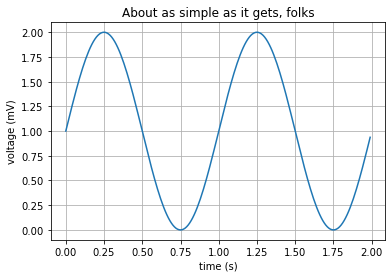

In [16]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

<AxesSubplot:xlabel='carat', ylabel='price'>

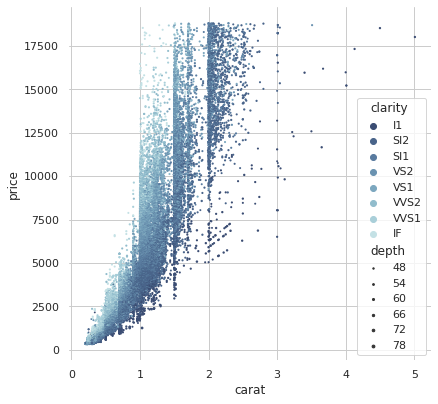

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

### Pandas
<a href="https://pandas.pydata.org/">Pandas</a> is a library for chart data visualization and also for analysis and handling of large amounts of data. It became most popular for time series analysis.

In [22]:
import pandas as pd

d = {'col1': [1, 2, 9, -17], 'col2': [3, 4, 4, 1000], 'col3': ["A", "B", "C", "D"]}

pd.DataFrame(data=d)

,col1,col2,col3
0,1,3,A
1,2,4,B
2,9,4,C
3,-17,1000,D


### Scipy
<a href="https://www.scipy.org/">Scipy</a> is a general purpose library for science and engineering offering mostly functionalities for signal analysis, filtering and regression.

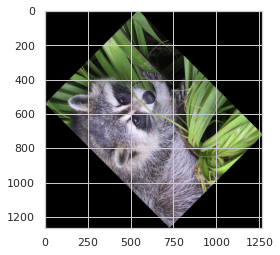

In [26]:
# preprocessing e.g. for machine learning
# just one of the more illustrative example for many different things you can do with scipy
from scipy import ndimage, misc
from matplotlib import pyplot as plt
panda = misc.face()
#rotatation function of scipy for image – image rotated 135 degree
panda_rotate = ndimage.rotate(panda, 135)
plt.imshow(panda_rotate)
plt.show()

### Statsmodels
As the name implies, the library <a href="https://www.statsmodels.org/">Statsmodels</a> offers a big variety of statistical models and tests for your data.

In [30]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.90e-08
Time:                        06:57:53   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Tensorflow
<a href="https://www.tensorflow.org/">Tensorflow</a> is the most popular machine learning library developed mostly by Google besides the competing <a href="https://pytorch.org/">pytorch</a> by Facebook. It is popular for its automatic differentiation feature which lets you specify arbitrary models instead of just predefined ones like in statsmodels.

In [ ]:
import tensorflow as tf

#load your data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#define a creative (and useful) model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

#train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

### Requests

There are many other non scitific fields with very useful libraries like <a href="https://www.tensorflow.org/">Requests</a>, which lets you send http requests using python. 

In [45]:
import requests
   
# Making a GET request - let's hack my github account
r = requests.get('https://api.github.com/users/felbecker')
  
# check status code for response received
# success code - 200
print(r)
  
# print content of request
print(r.json()["name"])
print(r.json()["created_at"])
print(r.json()["site_admin"])
print(r.json()["public_repos"])

<Response [200]>
FelixBecker
2016-06-20T13:28:07Z
False
16


## How to list installed modules and install new modules in Python

Often you would like to use the functionality of a 3rd-party module, but the module is not installed (this may not be the case for the above libraries as we use a jupyter image with preinstalled packages).

In most Python environments, a package manager is used to administer the installed modules. 

In most cases, this is either <a href="https://docs.python.org/3/installing/index.html">pip</a> or if you use the Anaconda environment, it will be <a href="">conda</a> and pip.

`pip` (Package Installer for Python) downloads and installs packages and their dependencies from the Python Package Index (PyPI). Everyone can contribute their packages to PyPI and make them available for others.

`conda` is an open source package management system and environment management system that runs on Windows, macOS, Linux and z/OS. It is not limited to Python and installs pre-build packages. 

**In order to check which modules are installed (in your current virtual environment), you can use the command:**

`pip list` or `conda list`

on the command-line prompt in a console or in a cell:

In [46]:
%%bash
conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
_r-mutex                  1.0.1               anacondar_1    conda-forge
absl-py                   0.12.0                   pypi_0    pypi
alembic                   1.6.5              pyhd8ed1ab_0    conda-forge
alsa-lib                  1.2.3                h516909a_0    conda-forge
anyio                     3.1.0            py39hf3d152e_0    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
argon2-cffi               20.1.0           py39h3811e60_2    conda-forge
astunparse                1.6.3                    pypi_0    pypi
async_generator           1.10                       py_0    conda-forge
attrs                     21.2.0             pyhd8ed1ab_0    conda-forge
babel                     2.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/h5py-3.2.1-nompi_py39h98ba4bc_100.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/numpy-1.20.3-py39hdbf815f_1.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/six-1.16.0-pyh6c4a22f_0.json.  Please remove this file manually (you may need to reboot to free file handles)


In [47]:
%%bash
conda list | grep tensorflow

tensorflow                2.5.0                    pypi_0    pypi
tensorflow-estimator      2.5.0                    pypi_0    pypi


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/h5py-3.2.1-nompi_py39h98ba4bc_100.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/six-1.16.0-pyh6c4a22f_0.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename /opt/conda/conda-meta/numpy-1.20.3-py39hdbf815f_1.json.  Please remove this file manually (you may need to reboot to free file handles)


These are the packages that are installed in the default environment. In our case they are part of the jupyter image that we loaded. 

However, when do you do if you need a package in different versions for different project, or do not want a very specific package that you need only for your very specific project and then never again to appear in the default environment?

A `conda` environment can have different packages and package versions installed. In order to not create a mess using conflicting versions of Python modules or imagine your code only works with specific versions of Python modules, you can create and use different Python environments.

**You can list the currently existing environments using**

In [7]:
%%bash
conda env list

# conda environments:
#
                         /home/jovyan/brain/bin/python/miniconda3
                         /home/jovyan/brain/bin/python/miniconda3.7
                         /home/jovyan/brain/bin/python/miniconda3/envs/bioconda
base                  *  /opt/conda



<font size="3"><b>You can create a new (empty) environment using</b></font>

In [ ]:
%%bash
conda create --name pyprog

<font size="3"><b>You can switch to a specific environment using</b></font>

In [ ]:
%%bash
conda activate new_env

<font size="3"><b>And check on the actual activated environment using</b></font>

In [8]:
%%bash
conda info


     active environment : base
    active env location : /home/mru/anaconda3
            shell level : 1
       user config file : /home/mru/.condarc
 populated config files : 
          conda version : 4.10.3
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __cuda=11.2=0
                          __linux=5.8.0=0
                          __glibc=2.32=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /home/mru/anaconda3  (writable)
      conda av data dir : /home/mru/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/mru/anaconda3/pkgs
                          /home/mru/.con

In [ ]:
%%bash
conda deactivate

<br><br><br>
## Numpy 

Often, you have a file e.g. a CSV file with comma-separated values and you need to convert the content yourself to a table-like datastructure. In this example, we have the famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris dataset</a> (in this case a very popular standard data set in data science). Let's have a look at the first 10 lines of the file:

In [3]:
%%bash
head -n 10 data/iris.csv

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Of course, we could now manually readin the file line by line, but then we would need to process the strings and convert them to a table-like data structure. <b>Luckily, there are already functions in the 3rd party libraries <a href="https://numpy.org/"><i>numpy</i></a> and <a href="https://pandas.pydata.org/"><i>pandas</i></a> that solve this problem.
    
Recently, a <a href="https://www.nature.com/articles/s41586-020-2649-2">paper</a> about the numpy Python package was published in *nature*.

<img src="img/numpy_nature.webp" width="100%">

*Source: <a href="https://www.nature.com/articles/s41586-020-2649-2">https://www.nature.com/articles/s41586-020-2649-2*
    
**Numpy** is a powerful 3rd party package offering the new data type of the <b><i>numpy array</i></b> (numpy.ndarray) with a more powerful and faster implementation in C++ in the background. **Numpy** is essential for scientific programming. In contrast to lists in Python, <b>the size of a numpy array cannot be changed without creating a new array and the best practice is to allocate space in advance by initializing an empty array (e.g. filled with zeros)</b>. Also, the data type of its elements shouldn't differ and the number of elements in each row or column has to be the same, since <b>the numpy array represents a N x M matrix.<br><br>
<b>To sum it up, a numpy array behaves like a "classic" array in other high-level programming languages due to it's precompiled C++ implementation in the background.</b><br><br>
<font size="3">In order to use Numpy, you have to import the package once. Since you will in the following often have to refer to numpy, we assign an alias that is faster to type (np) since programmers are lazy:</font>
</font>

In [15]:
# import num<py with alias np
import numpy as np

### NumPy Array

<br>
<font size="3">A NumPy Array can have many dimensions. Let's start with one (similar to a Python list) and two dimensions (similar to a matrix):</font>

In [16]:
# create a numpy array from a list
arr1 = np.array([1.0,2.35,3.141])
print("type(arr1) =", type(arr1))
print("arr1 =", arr1)
print("arr1.dtype =", arr1.dtype)

type(arr1) = <class 'numpy.ndarray'>
arr1 = [1.    2.35  3.141]
arr1.dtype = float64


In [17]:
# create an 2D array / a 3x3 matrix filled with zeros
arr2 = np.zeros((3,3))
print("type(arr2) =", type(arr2))
print("arr2 = \n", arr2)
print("arr2.dtype =", arr2.dtype)

type(arr2) = <class 'numpy.ndarray'>
arr2 = 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
arr2.dtype = float64


In [18]:
# create a numpy array filled with a specific value
arr3 = np.full((3,2), 2)
print("arr3 = \n", arr3)
print("arr3.dtype =", arr3.dtype)

arr3 = 
 [[2 2]
 [2 2]
 [2 2]]
arr3.dtype = int64


Question: In the above cell, why is the dtype suddenly integer?

In [19]:
# index an array element in a multi-dimensional array
arr2[0,0] = 1
arr2[1,1] = 2
arr2[2,2] = 3
print("type(arr2) =", type(arr2))
print("arr2 = \n", arr2)
print("arr2.dtype =", arr2.dtype)

type(arr2) = <class 'numpy.ndarray'>
arr2 = 
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
arr2.dtype = float64


Sliced indexing follows the same rules as for regular python lists:

In [35]:
#take all elements after the first from the first axis and all elements except the last from the second axis
#returns a "view" into the original array without copying anything
sliced_arr2 = arr2[1:, :-1] 
print("sliced arr2 = \n", sliced_arr2)

sliced arr2 = 
 [[0. 2.]
 [0. 0.]]


In [20]:
# using the attribute "size" of the numpy array is more reliable than using the len() function
# the attribute "shape" contains a tuple with the array or matrix dimensions
print("arr2.size =", arr2.size)
# convention for the shape tuple: (number of rows, number of columns) in case of a 2D array
print("arr2.shape =", arr2.shape)

arr2.size = 9
arr2.shape = (3, 3)


Sometimes you want or need to change the shape of your numpy array using the `reshape` method:

In [32]:
# defines a numpy array with row number unequal column number
arr3 = np.array([[2,3],[3,5],[6,4]])
print("content of arr3:")
print(arr3)

# prints the shape (number of rows, number of columns)
print("shape of arr3:")
print(arr3.shape)

# the same result could be achieved using the reshape method expecting a tuple 
# (total number of elements needs to be the same!)
arr4 = arr3.reshape(2,3)

print("reshaped array:\n", arr4)
print("shape of the reshaped array:", arr4.shape)

content of arr3:
[[2 3]
 [3 5]
 [6 4]]
shape of arr3:
(3, 2)
reshaped array:
 [[2 3 3]
 [5 6 4]]
shape of the reshaped array: (2, 3)


There is also the `transpose` method. Beware that it does *not* the same as `reshape`:

In [33]:
# transposes the array / matrix
arr5 = arr3.T
print("transposed array (rows and columns interchanged):")
print(arr5)

# prints the shape of the transposed array
print("shape of the transposed array:", arr5.shape)

transposed array (rows and columns interchanged):
[[2 3 6]
 [3 5 4]]
shape of the transposed array: (2, 3)


<font size="3"><b>Often you would like to perform computations over an entire row or column of your array (hence your dataset), like:
    </b></font>

In [5]:
# generates a 2D matrix of random floating-point numbers
# np.random.normal generates normally distributed random numbers and expects (mean, standard deviation, size=(a,b))
arr = np.random.normal(0,2,size=(6,8))
print("random number array:")
print(arr)

# sums all values in each column
col_sum = np.sum(arr, axis=0)
#print("row_sum = "+str(row_sum))

# sums all values in each row
row_sum = np.sum(arr, axis=1)
#print("col_sum = "+str(col_sum))

# multiplies all values in each column
col_prod = np.prod(arr, axis=0)
#print("row_prod = "+str(row_prod))

# multiplies all values in each row
row_prod = np.prod(arr, axis=1)
#print("col_prod = "+str(col_prod))

# calculate mean
total_mean = np.mean(arr)
print("Overall mean:"+str(total_mean))
# calculate standard deviation
total_std = np.std(arr)
print("Overall standard deviation:"+str(total_std))

# calculate mean over all elements in a column (iterates over first array dimension)
col_mean = np.mean(arr, axis=0)
print(col_mean)

# calculate mean over all elements in a row (iterates over second array dimension)
col_mean = np.mean(arr, axis=1)
print(col_mean)

random number array:
[[ 0.69155771  1.05404779  2.00053817 -0.64287973 -1.88192273  0.71156505
  -3.30040426 -0.09984976]
 [-1.27785057  1.29422894 -1.55355293  0.27523196  0.44118924  2.45971609
   1.41526056 -0.2544128 ]
 [-1.22906163  0.07217583  1.1266327   0.11870389  2.02426348  2.43643977
  -5.41346238  2.01616514]
 [ 1.14728963 -1.9920876  -4.01950574  1.94603574 -0.41840262  2.70844872
  -2.78285757 -3.30599101]
 [-1.01774104 -0.67308274 -4.28079489  0.93496898  0.49920896 -0.09342604
   0.69135856 -1.0535226 ]
 [-1.19669249  0.45463304 -3.88571074  2.45914936  1.66187442  1.20443317
  -1.5861446  -0.56296328]]
Overall mean:-0.22244172563587483
Overall standard deviation:1.9508043415545768
[-0.4804164   0.03498588 -1.76873224  0.84853503  0.38770179  1.57119613
 -1.82937495 -0.54342905]
[-0.18341847  0.34997631  0.1439821  -0.8396338  -0.62412885 -0.18142764]


<font size="3"><b>Of course, you can also do elementwise manipulations and matrix multiplications (that was one of the original purposes of numpy):</b></font>

In [6]:
arr = np.array([1,2,3,4])
print("arr:")
print(arr)

# e.g multiply each element with value
print("result of arr * 3.141:")
print(arr * 3.141)

# compute the products of two arrays element-wise
arr2 = np.array([5,6,0,1])
print("arr2:")
print(arr2)
result = arr * arr2
print("result of arr * arr2:")
print(result)

# compute the dot or scalar product of two vectors
result = np.dot(arr, arr2)
print("result of arr (dot) arr2:")
print(result)

# more general, compute the product of two matrices
arr = np.array([[1,2],[5,6],[4,2]])
arr2 = np.array([[5,6,7],[2,3,2]])
print("arr:")
print(arr)
print("arr2:")
print(arr2)
result = np.matmul(arr, arr2)
print("result of matmul(arr,arr2):")
print(result)

arr:
[1 2 3 4]
result of arr * 3.141:
[ 3.141  6.282  9.423 12.564]
arr2:
[5 6 0 1]
result of arr * arr2:
[ 5 12  0  4]
result of arr (dot) arr2:
21
arr:
[[1 2]
 [5 6]
 [4 2]]
arr2:
[[5 6 7]
 [2 3 2]]
result of matmul(arr,arr2):
[[ 9 12 11]
 [37 48 47]
 [24 30 32]]


<font size="3"><b>Now back to our CSV file, we can read-in the file using <a href="https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a></b></font>

In [36]:
# print the documentation string of the function
print(np.genfromtxt.__doc__)


    Load data from a text file, with missing values handled as specified.

    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.

    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : dtype, optional
        Data type of the resulting array.
        If None, the dtypes will be determined by the contents of each
        column, individually.
    comments : str, optional
        The character used to indicate the start of a comment.
        All the characters occurring on a line after a comment are discarded
    delimiter : str, int, or sequence, optional
        The str

In [37]:
# load data file and convert it to (named) numpy array
iris_data = np.genfromtxt("data/iris.csv", names=True, delimiter=",")
# output just the first 20 rows
print("type(iris_data) = "+str(type(iris_data)))
print("iris_data[:20] = "+str(iris_data[:20]))
#print the guess data types for the columns of the table
print("iris_data.dtype = \n"+str(iris_data.dtype))

type(iris_data) = <class 'numpy.ndarray'>
iris_data[:20] = [(5.1, 3.5, 1.4, 0.2, nan) (4.9, 3. , 1.4, 0.2, nan)
 (4.7, 3.2, 1.3, 0.2, nan) (4.6, 3.1, 1.5, 0.2, nan)
 (5. , 3.6, 1.4, 0.2, nan) (5.4, 3.9, 1.7, 0.4, nan)
 (4.6, 3.4, 1.4, 0.3, nan) (5. , 3.4, 1.5, 0.2, nan)
 (4.4, 2.9, 1.4, 0.2, nan) (4.9, 3.1, 1.5, 0.1, nan)
 (5.4, 3.7, 1.5, 0.2, nan) (4.8, 3.4, 1.6, 0.2, nan)
 (4.8, 3. , 1.4, 0.1, nan) (4.3, 3. , 1.1, 0.1, nan)
 (5.8, 4. , 1.2, 0.2, nan) (5.7, 4.4, 1.5, 0.4, nan)
 (5.4, 3.9, 1.3, 0.4, nan) (5.1, 3.5, 1.4, 0.3, nan)
 (5.7, 3.8, 1.7, 0.3, nan) (5.1, 3.8, 1.5, 0.3, nan)]
iris_data.dtype = 
[('sepal_length', '<f8'), ('sepal_width', '<f8'), ('petal_length', '<f8'), ('petal_width', '<f8'), ('species', '<f8')]


<font size="3"><b>Obviously, the numpy function couldn't properly guess the data type of the last column (just returning a <i>NaN</i> (not an number). But we can correct that:</b></font>

In [68]:
# load data file again with defined data types and column names and 
# convert it to (named) numpy array
iris_data = np.genfromtxt("data/iris.csv", names=True,\
                          dtype=[('sepal_length', np.float32), ('sepal_width', np.float32),\
                                ('petal_length', np.float32), ('petal_width', np.float32),\
                                ('species', "<U16")], delimiter=",")
print("iris_data[:20] = "+str(iris_data[:20]))
#print the guess data types for the columns of the table
print("iris_data.dtype = \n"+str(iris_data.dtype))

iris_data[:20] = [(5.1, 3.5, 1.4, 0.2, 'setosa') (4.9, 3. , 1.4, 0.2, 'setosa')
 (4.7, 3.2, 1.3, 0.2, 'setosa') (4.6, 3.1, 1.5, 0.2, 'setosa')
 (5. , 3.6, 1.4, 0.2, 'setosa') (5.4, 3.9, 1.7, 0.4, 'setosa')
 (4.6, 3.4, 1.4, 0.3, 'setosa') (5. , 3.4, 1.5, 0.2, 'setosa')
 (4.4, 2.9, 1.4, 0.2, 'setosa') (4.9, 3.1, 1.5, 0.1, 'setosa')
 (5.4, 3.7, 1.5, 0.2, 'setosa') (4.8, 3.4, 1.6, 0.2, 'setosa')
 (4.8, 3. , 1.4, 0.1, 'setosa') (4.3, 3. , 1.1, 0.1, 'setosa')
 (5.8, 4. , 1.2, 0.2, 'setosa') (5.7, 4.4, 1.5, 0.4, 'setosa')
 (5.4, 3.9, 1.3, 0.4, 'setosa') (5.1, 3.5, 1.4, 0.3, 'setosa')
 (5.7, 3.8, 1.7, 0.3, 'setosa') (5.1, 3.8, 1.5, 0.3, 'setosa')]
iris_data.dtype = 
[('sepal_length', '<f4'), ('sepal_width', '<f4'), ('petal_length', '<f4'), ('petal_width', '<f4'), ('species', '<U16')]


In [69]:
# access column data with column name
print("iris_data['sepal_length'] = \n"+str(iris_data['sepal_length'][:20]))

iris_data['sepal_length'] = 
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1]


In [70]:
#work with the data
#compute mean of column
mean = np.mean(iris_data['sepal_length'])
#compute standard deviation of column
std = np.std(iris_data['sepal_length'], axis=0)
print("Mean of column sepal_length:" + str(mean))
print("Std of column sepal_length:" + str(std))

# round to n significant digits with np.round
print("Mean of column sepal_length:" + str(np.round(mean,3)))

# or just change the number output format

Mean of column sepal_length:5.8433332
Std of column sepal_length:0.8253013
Mean of column sepal_length:5.843


We now want to explore how to solve a relatively simple task in multiple ways to get a feeling of the variety of tools python proposes to us and an intuition of what to decide for depending on the complexity of the task.

<div class="alert alert-block alert-success"><b>Exercise:</b> We want to count the number of examples we have for each species (e.g. setosa). Try to solve this task...
       <ol type="1">
           <li>using only basic python syntax and a <b>dict</b>.
           <li>using the class <a href="https://docs.python.org/3/library/collections.html#collections.defaultdict">defaultdict</a> from the standard library <b>collections</b>.
           <li>using the <b>==</b> operator and <b>np.sum</b>.
           <li>using the function <a href="https://numpy.org/doc/stable/reference/generated/numpy.unique.html">numpy.unique</a> using the argument <i>return_counts</i>. 
       </ol>
</div>

In [71]:
# YOUR CODE HERE

In [74]:
# example solution
species = iris_data["species"]

# 1
counts = {}
for s in species:
    if s in counts:
        counts[s] += 1
    else:
        counts[s] = 1
print("1.\n", counts)

#2
from collections import defaultdict
counts = defaultdict(int) # values will default to 0
for s in species: 
    counts[s] += 1
print("2.\n", counts)

#3 
#using dictionary comprehension
counts = {s : np.sum(species == s) for s in species}
print("3.\n", counts)

#4 
counts = np.unique(species, return_counts=True)
print("4.\n", counts)

1.
 {'setosa': 50, 'versicolor': 50, 'virginica': 50}
2.
 defaultdict(<class 'int'>, {'setosa': 50, 'versicolor': 50, 'virginica': 50})
3.
 {'setosa': 50, 'versicolor': 50, 'virginica': 50}
4.
 (array(['setosa', 'versicolor', 'virginica'], dtype='<U16'), array([50, 50, 50]))


Lets do short discussion:

1. Which is the most natural and readable attempt in your opinion?
2. Is there a *best* way of solving this task?
3. Do you ever want to use approach 1 over the others?

<font size="3"><div class="alert alert-block alert-success"><b>Optional Exercise:</b> Write a function which loads a file (<b>in this case applied to <i>data/glass.csv<i></b>), print the shape of the resulting array, print the first N rows (adjustable via a function argument), compute and return the means and standard deviations for the data columns and print the results (adjustable via a parameter). The result of <b>numpy.genfromtxt is different in this case since glass.csv does not contain mixed data types. You don't need to specify the column data types in this case.</b><br><br>
    <b>Hint:</b> <b>Use the numpy functions <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html">np.std</a></b> to compute the mean and the standard deviaton. The parameter axis allows to specifiy for which dimension/axis you'd like to perform the computation. So you don't need to use a loop.<br><br>
If you use the keyword argument <b>names = True</b> in numpy.genfromtxt, a named array will be returned where column data can be addressed via the column name defined in the first row of the file.
</div>
    
<b>Try it yourself here:</b></font>

### Example Solution:

In [75]:
import numpy as np  
def process_file(file, n_rows = 10, print_result = True): 
    glass_data = np.genfromtxt(file, delimiter=",", skip_header=1) 
    print(glass_data[:n_rows,:]) 
    means = np.mean(glass_data, axis = 0) 
    stds = np.std(glass_data, axis = 0) 
    if print_result: 
        print("means:"+str(means)) 
        print("stds:"+str(stds)) 
    return means, stds
means, stds=process_file("data/glass.csv", n_rows = 10, print_result = True)

[[1.00000e+00 1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01
  6.00000e-02 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [2.00000e+00 1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01
  4.80000e-01 7.83000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [3.00000e+00 1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01
  3.90000e-01 7.78000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [4.00000e+00 1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01
  5.70000e-01 8.22000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [5.00000e+00 1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01
  5.50000e-01 8.07000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [6.00000e+00 1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01
  6.40000e-01 8.07000e+00 0.00000e+00 2.60000e-01 1.00000e+00]
 [7.00000e+00 1.51743e+00 1.33000e+01 3.60000e+00 1.14000e+00 7.30900e+01
  5.80000e-01 8.17000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [8.00000e+00 1.51756e+00 1.31500e+01 3.6

<br><br><br>
## Visualizing Data with Matplotlib
<br>
<font size="3">
    <b>One picture can say more than 1000 words:</b> Visualizing your data is probably the most important aspect in your daily work routine. <a href="https://matplotlib.org/">Matplotlib</a> is the most common Python package for data visualization offering a multitude of different plot types and options to tailor the plots according to your needs. Even Latex can be used to obtain nice looking plot titles, axes labels and annotations.<br><br>
    <a href="https://matplotlib.org/gallery/index.html">See a plot gallery here</a> of all the possibilities and functions matplotlib offers out-of-the-box.
</font>

### Example 1:

<font size="3">First you need to import the pyplot function from matplotlib using</font>

In [43]:
import matplotlib.pyplot as plt

<font size="3">Then we plot a simple sine:</font>

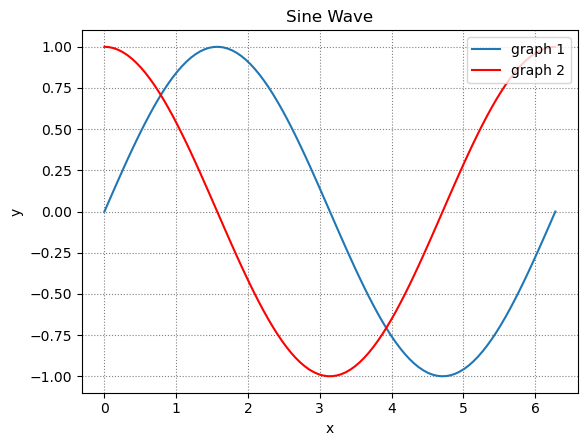

In [59]:
# array [0, .01, .02, ..., 2*3.14]
# one option is np.arange
#x = np.arange(start = 0, stop = 2 * np.pi, step = 0.01) 
# another option is np.linspace
x = np.linspace(0, 2*np.pi, 100)
# applies sine elementwise
y = np.sin(x) 
# data for the 2nd graph
y2 = np.cos(x)

# figure size and resolution in dpi (dots per inch)
width_px = 640
height_px = 480
dpi = 100
# create a figure
fig = plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi)
# create a new plot
ax = fig.add_subplot(111)
# create the plot
ax.plot(x, y, label="graph 1")
ax.plot(x, y2, color="red", label="graph 2")
# adds a grid
ax.grid(which="both", color="gray", linestyle=":")
# semicolon suppresses output of last line in cell
ax.set_title("Sine Wave"); 
ax.set_xlabel("x");
ax.set_ylabel("y");
# adds a legend for the graphs in the plot
ax.legend(loc="upper right")

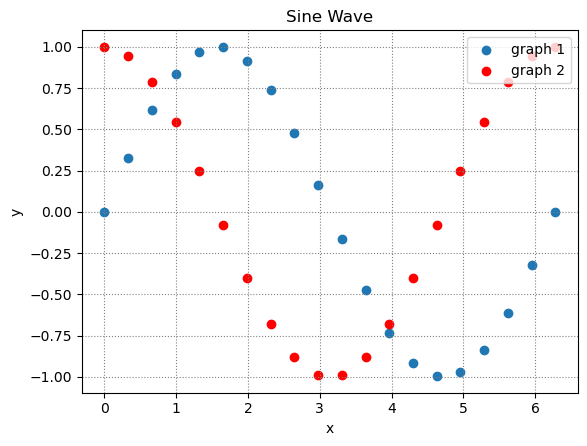

In [62]:
# array [0, .01, .02, ..., 2*3.14]
# one option is np.arange
#x = np.arange(start = 0, stop = 2 * np.pi, step = 0.01) 
# another option is np.linspace
x = np.linspace(0, 2*np.pi, 20)
# applies sine elementwise
y = np.sin(x) 
# data for the 2nd graph
y2 = np.cos(x)

# figure size and resolution in dpi (dots per inch)
width_px = 640
height_px = 480
dpi = 100
# create a figure
fig = plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi)
# create a new plot
ax = fig.add_subplot(111)
# create the plot
ax.scatter(x, y, label="graph 1")
ax.scatter(x, y2, color="red", label="graph 2")
# adds a grid
ax.grid(which="both", color="gray", linestyle=":")
# semicolon suppresses output of last line in cell
ax.set_title("Sine Wave"); 
ax.set_xlabel("x");
ax.set_ylabel("y");
# adds a legend for the graphs in the plot
ax.legend(loc="upper right")

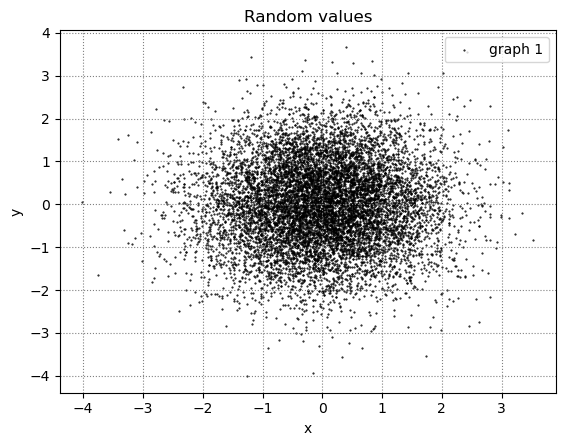

In [82]:
# generates an array with normal distributed random values
N = int(1E4)
x = np.random.normal(0, 1, (N,))
# applies sine elementwise
y = np.random.normal(0, 1, (N,))

# figure size and resolution in dpi (dots per inch)
width_px = 640
height_px = 480
dpi = 100
# create a figure
fig = plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi)
# create a new plot
ax = fig.add_subplot(111)
# create the plot
ax.scatter(x, y, label="graph 1", s=1, color="black", marker=".")
# adds a grid
ax.grid(which="both", color="gray", linestyle=":")
# semicolon suppresses output of last line in cell
ax.set_title("Random values"); 
ax.set_xlabel("x");
ax.set_ylabel("y");
# adds a legend for the graphs in the plot
ax.legend(loc="upper right")

### Example 2:

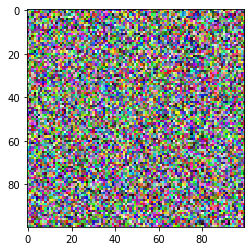

In [91]:
Img = np.random.randint(low=0, high=255, size=(100, 100, 3), dtype='B') # B: unsigned byte (0..255)
#print(Img) # Img is a three-dim array
plt.imshow(Img, interpolation="none"); # third dimension interpreted as red, green, blue
# image coordinates are numbered as in matrices, first rows (top to bottom) then columns (left to right)

### More complex Example 3:

<br>
<font size="3">
A more complex example demonstrating almost all capabilities to customize your plot:
</font>

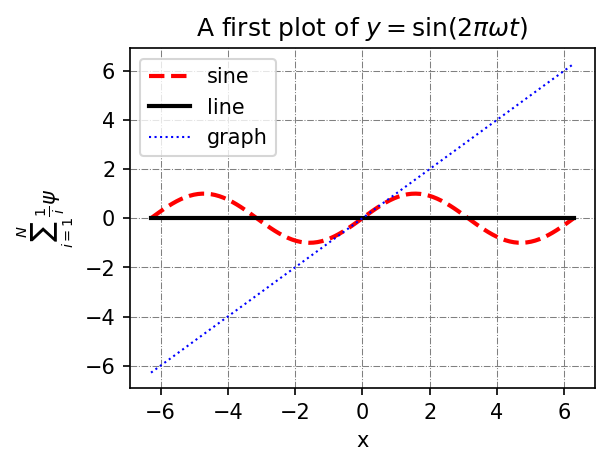

In [71]:
# a very simple example to begin with
import numpy as np
from matplotlib import pyplot as plt

# generate the data to plot
omega = 1
# yields a numpy array of N equidistant points on the given interval
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

# here you can set the size and resolution of the plot
#resolution in dpi = dots per inch
# for the screen 75 to 120 dpi isfine
# for a publication you'd need to use a higher resolution of 150 or 300 dpi
dpi = 150
# height in inch
height = 3 
# width in inch
width = 4

# initalize the new figure
fig = plt.figure(figsize=(width, height), dpi=dpi)

# Here you could specify multiple plots aside or in a matrix configurationn
# we just want one plot in the figure, 
# thats why we set 111 = number of rows, number of columns, total num of plots
ax = fig.add_subplot(111)

# create the plot itself (a line plot connecting the points)
# plot the sine
ax.plot(x, y, color = "r", linestyle = "--", linewidth = 2, label = "sine")
# plot a constant line at zero
ax.plot(x, np.zeros(x.shape), color = "black", linestyle = "-", linewidth = 2, label = "line")
# plot a graph
ax.plot(x, x, color = "blue", linestyle = ":", linewidth = 1, label = "graph")

# use a grid in the background
ax.grid(which="both", color="gray", linestyle="-.", linewidth=0.5)

# set the plot title using Latex
# the semicolon at the end of the line is to suppress the output of the function
# (one of the rare cases where you'd end a line of Python code with a semicolon)
ax.set_title("A first plot of " + r'$y = \sin\left(2 \pi \omega t\right)$');

# set the axes labels
ax.set_xlabel("x");
ax.set_ylabel(r'$\sum_{i=1}^{N} \frac{1}{i} \psi$');

# normal string definition in Python uses "string"
# in order to use Latex in title or axes label, use r'string'
# Why is that?
# If double quotation marks are used, the string is "processed" and the so-called escape sequences (e.g. \n for a linebreak are replaced)
# If single quotation marks like r'string' are used, the string is stored as it is.

# use the plot legend
# only works if keyword argument 'label' was given to the method plot
ax.legend()

# save the plot in a file
# the file ending determines the format
# valied formats are e.g. jpg, png for raster graphics (will become pixelated if you zoom in and the resolution is too small)
# you can also export the plot as vector graphics with ending .eps (will be rendered at every zoom level)
fig.savefig("plot.png")

### More complex Example 2:

<br>
<font size="3">A histogram plot as more complex example for a plot:</font>

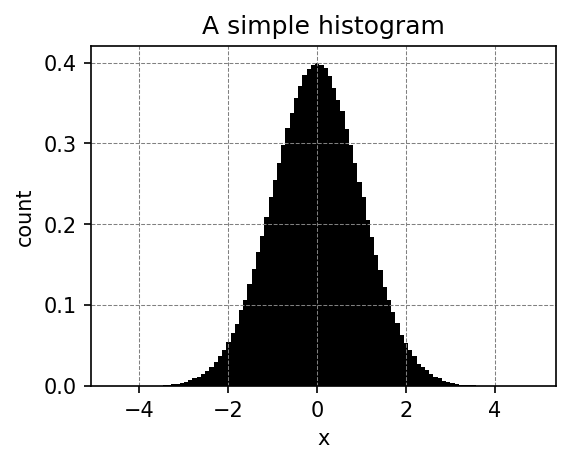

In [93]:
# a very simple example to begin with
import numpy as np
from matplotlib import pyplot as plt

# generate data to work with
num_values = 1E6
x = np.random.normal(0,1,int(num_values))

# here you can set the size and resolution of the plot
#resolution in dpi = dots per inch
# for the screen 75 to 120 dpi isfine
# for a publication you'd need to use a higher resolution of 150 or 300 dpi
dpi = 150
# height in inch
height = 3 
# width in inch
width = 4

# initalize the new figure
fig = plt.figure(figsize=(width, height), dpi=dpi)

# Here you could specify multiple plots aside or in a matrix configurationn
# we just want one plot in the figure, 
# thats why we set 111 = number of rows, number of columns, total num of plots
ax = fig.add_subplot(111)

# plots a histogram, use parameter density to normalize the vertical axis
h=ax.hist(x, bins=100, color="black", density=True)
ax.set_ylabel("count");
ax.set_xlabel("x");
ax.set_title("A simple histogram")
ax.grid(which="both",color="gray",linewidth=0.5,linestyle="--")

<font size="3">For further options to customize plots, have also a look at the predefined <a href="https://matplotlib.org/3.1.0/gallery/color/named_colors.html">color</a> and <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.lineStyles">linestyle</a> or <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.lineStyles">here</a> keywords on the matplotlib website.</b>
</font>

<font size="3">
<div class="alert alert-warning"><b>Exercise 5:</b> Create a plot for the function f(x) = 3x + 2 in the interval [-2, 3] in <b>black</b>. Also plot a horizontal, <b>red</b>, <b>dashed</b> line in the same graph at y = 1.
<br><br>
<b>Hint:</b> Use np.arange or <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">np.linspace</a> to create an array with x values. Use the style keywords color and linestyle to change the appearance of the graphs. Use <a href="https://numpy.org/doc/stable/reference/generated/numpy.full.html">np.full</a> to create an array filled with a given value.
</div>
</font>

### Try it yourself:

### Example Solution:

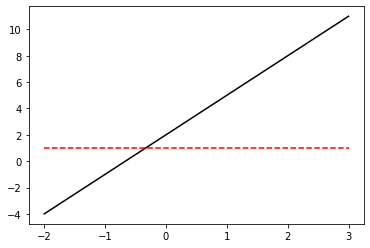

In [78]:
from matplotlib import pyplot

# creates an array with 100 values between -2 and 3 
x = np.linspace(-2,3,100)
y = 3 * x + 2
# creates an array with 100 elements filled with 1
y2 = np.full(100, 1)

plt.plot(x,y,color="black")
plt.plot(x,y2,color="red",linestyle="--")

<br><br><br>
## A short introduction to Pandas

<br>
<font size="3">
Neither NumPy arrays, nor any of the native Python data structures (e.g. lists, dicts, ...) are suitable to handle the data that is typically generated in scientific experiments or by surveys. These are typically tables where one column contains one data type, but different columns may have different data types. As you could see, this is problematic when numpy is used. The solution in Python is to use <a href="https://pandas.pydata.org/">Pandas</a>. Pandas is also most popular for time series data and it also facilitates any statistical evaluation on big data sets.
<br><br>
If we want to use Pandas, we have to import it:
</font>

In [1]:
import pandas as pd

<font size="3">
With Pandas, we can easily import a csv file that had previously been exported from LibreOffice Calc (or similar Office software):
</font>

In [2]:
melon = pd.read_csv('data/melon.csv', sep='\t')
melon

,variety,yield
0,A,25.12
1,A,17.25
2,A,26.42
3,A,16.08
4,A,22.15
5,A,15.92
6,B,40.25
7,B,35.25
8,B,31.98
9,B,36.52


We can play with accessing parts of the melon data set. In pandas, we can use indexing in the table as usual with the `iloc` function.

In [50]:
print("access lines 1 and 2, all columns:")
# line index is 0-based
# integer-location based indexing for selection by position
print(melon.iloc[1:3,:])

access lines 1 and 2, all columns:
  variety  yield
1       A  17.25
2       A  26.42


In [3]:
print("access a particular single value as scalar:")
print(melon.iloc[1,1])

access a particular single value as scalar:
17.25


In [4]:
print("access a column by name (only first couple of lines):")
# access a whole column with column name as index
print(melon["variety"].head()) #melon.variety works as welL!

access a column by name (only first couple of lines):
0    A
1    A
2    A
3    A
4    A
Name: variety, dtype: object


In [57]:
print("access multiple columns:")
# access multiple columns with list of column names
print(melon[["variety","yield"]].head())

access multiple columns:
  variety  yield
0       A  25.12
1       A  17.25
2       A  26.42
3       A  16.08
4       A  22.15


In [58]:
# like in Numpy we can also use comparisons in Pandas when elements are addressed
print("yields rows of dataframe where yield >37:")
print(melon[melon['yield'] > 37])

yields rows of dataframe where yield >37:
   variety  yield
6        B  40.25
10       B  43.32
11       B  37.10


In [59]:
# just selects entries matching the condition
print("yields rows of dataframe where variety == D:")
print(melon[melon['variety'] == 'D'])

yields rows of dataframe where variety == D:
   variety  yield
18       D  28.55
19       D  28.05
20       D  33.20
21       D  31.68
22       D  30.32
23       D  27.58


In [60]:
# count the number of occurrences of this variety 
print(melon[melon["variety"] == "C"].count())

variety    6
yield      6
dtype: int64


In [7]:
# group-by functionality facilitates analyses
# computes the mean for each data group based on column variety which can contain A,B,C or D
print(melon.groupby("variety").count())
print(melon.groupby("variety").mean())
print(melon.groupby("variety").std())

         yield
variety       
A            6
B            6
C            6
D            6
             yield
variety           
A        20.490000
B        37.403333
C        19.491667
D        29.896667
            yield
variety          
A        4.694422
B        3.950497
C        5.560052
D        2.229894


<font size="3">Table-like data in Pandas is stored in DataFrame objects, as we can see, when we check the datatype of our melon dataset:</font>

In [62]:
print(type(melon))

<class 'pandas.core.frame.DataFrame'>


<font size="3">A DataFrame can also be created manually from one or more lists or numpy arrays:</font>

In [63]:
# You can define a name for each column with the parameter columns
# The special thing about Pandas is now that one column can also be defined as index or can
# be explicitly defined. Indexation is a key feature of big databases to speed-up queries.b
df = pd.DataFrame([123,23,54,15,89], columns=["numbers"], index=["a","b","c","d","e"])
df

,numbers
a,123
b,23
c,54
d,15
e,89


You can then access elements also by their identifiers specified in with the *index* argument above using `loc`.

In [73]:
print("df.loc[c]: \n", df.loc["c"], "\n")
#which is the same as
print("df.iloc[2]: \n", df.iloc[2])

numbers    54
Name: c, dtype: int64
numbers    54
Name: c, dtype: int64


The distinction is useful for instance when splitting or concatenating dataframes: `iloc` will change, `loc` won't:

In [78]:
df_sliced = df[2:]
print("df_sliced:\n", df_sliced, "\n")
print("df.loc[c]: \n", df_sliced.loc["c"], "\n")
print("df.iloc[2]: \n", df_sliced.iloc[2])

df_sliced:
    numbers
c       54
d       15
e       89 

df.loc[c]: 
 numbers    54
Name: c, dtype: int64 

df.iloc[2]: 
 numbers    89
Name: e, dtype: int64


<font size="3">A Pandas DataFrame object also has useful attributes like index and columns:</font>

In [88]:
print(df.index)
print(df.columns)
print(df.dtypes)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['numbers'], dtype='object')
numbers    int64
dtype: object


<font size="3">Once defined, in contrast to a numpy array, a DataFrame can be enlarged as well by other columns even if the columns contain a different data type:</font>

In [90]:
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
df

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair


In [91]:
print(df.dtypes)

numbers      int64
floats     float64
names       object
dtype: object


<font size="3">Or we simply add a new row with data providing a new DataFrame, but once an index has been defined, we need to make sure to provide the index values as well:</font>

In [92]:
df.append(pd.DataFrame({'numbers': 273, 'floats': 8.98, 'names': "Florian"}, index=['f']))

,numbers,floats,names
a,123,1.23,Marco
b,23,5.67,Alex
c,54,4.31,John
d,15,6.89,Michael
e,89,5.34,Alistair
f,273,8.98,Florian


<div class="alert alert-block alert-success"><b>Exercise:</b>
Check out the original dataframe and some transformations applied to it in the next cell. Answer the following questions intuitively before checking the correct answer with code. After the slicing and concatenating,
<ol>
    <li>what name prints df_new.loc[0]?</li>
    <li>what name prints df_new.iloc[0]?</li>
    <li>what name prints df_new.loc[-1]?</li>
    <li>what name prints df_new.iloc[-1]?</li>
</ol>
</div>

In [91]:
df = pd.DataFrame()
df['numbers'] = [123,23,54,15,89]
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
print("df:\n", df)

#apply some slicing and concatenating
df1 = df.iloc[1:-1]
df2 = df1.loc[2]
df3 = df.iloc[0]
df_new = df1.append(df2).append(df3)

df:
    numbers  floats     names
0      123    1.23     Marco
1       23    5.67      Alex
2       54    4.31      John
3       15    6.89   Michael
4       89    5.34  Alistair


<br><br>
<font size="3">The index of a Pandas DataFrame can also be a timestamp which is useful for time series data. Pandas also has some useful built-in plotting functionality. As example, we load the dataset of the DAX share price index and plot it using Pandas.

 
<b>We need to install a new package first:</b></font>

In [ ]:
%%bash
pip install pandas-datareader

Then we need to import the new module and download the data. According to the doc:

*Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.*

In the function we use the following endpoint:

*yahoo - retrieve daily stock prices (high, open, close, volu,e and adjusted close)*

where `name='^GDAXI'` is the name of a particular stock.

This is just another example of how a python package simplifies a tedious task behind a single function call for us.

In [11]:
# imports a function to download price data from the web
from pandas_datareader import DataReader
dax = DataReader(name='^GDAXI', data_source="yahoo", start='2000-1-1')
# only returns the first N rows (default: 5) of the data table
dax.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961


<font size="3">Pandas Dataframe objects have useful attributes:</font>

In [12]:
# gives the total number of values in the table
print("size:", dax.size)
# gives the number of rows x columns in the table
print("shape:", dax.shape)
# gives a complete summary of the table (size, data types)
print("info:", dax.info)
# returns the index column of the table
# it is important to set an index e.g. the timestamp as index for time-series data
print("index:", dax.index)
# returns the values of the table (as a numpy array)
print("values:", dax.values)
# returns the column names of the table
print("columns:", dax.columns)

size: 34512
shape: (5752, 6)
info: <bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2000-01-03   7159.330078   6720.870117   6961.720215   6750.759766   
2000-01-04   6755.359863   6510.459961   6747.240234   6586.950195   
2000-01-05   6585.850098   6388.910156   6585.850098   6502.069824   
2000-01-06   6539.310059   6402.629883   6501.450195   6474.919922   
2000-01-07   6791.529785   6470.140137   6489.939941   6780.959961   
...                  ...           ...           ...           ...   
2022-08-24  13238.610352  13085.200195  13131.120117  13220.059570   
2022-08-25  13364.549805  13210.990234  13328.490234  13271.959961   
2022-08-26  13375.019531  12939.959961  13335.099609  12971.469727   
2022-08-29  12942.459961  12758.440430  12838.419922  12892.990234   
2022-08-30  13154.150391  12885.080078  12919.429688  12961.139648   

                Volume

<font size="3">Finally, we directly plot now out of Pandas:</font>

<AxesSubplot:xlabel='Date'>

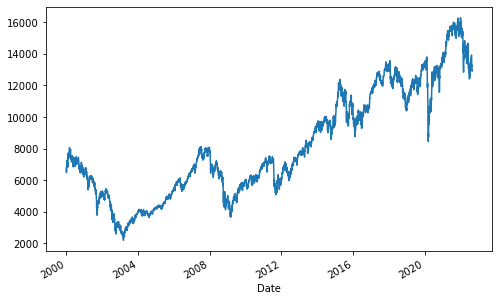

In [19]:
dax["Close"].plot(figsize=(8,5))

Install required packages for Excel support in Pandas, if not already installed. Typically you find out that a package is missing from an error message or by simply studying the documentation. 

Note that as a package manager, **`pip` is able to install required dependencies of a package automatically**. Sometimes however, specific functionally has optional requirements. After all however, the burden of installing packages is easier than it seems here.

In [ ]:
%%bash
pip install xlrd

<font size="3"><b>Pandas also supports other file formats like <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html">Excel sheets</a> or for bigger datasets the <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html">parquet</a> or <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html">feather</a> file format:</b></font>

In [22]:
# example loading an excel sheet with Pandas in Python
excel = pd.read_excel('data/example.xls')
excel

,Type,Name,Business,ISIN,Price / EUR
0,Fonds,F.TEM.INV-F.TECHN.A A.EUR,IT,A0KEDE,39.160
1,ETF,ISHSIII-CORE MSCI WLD DLA,World Economy,A0RPWH,72.512
2,ETF,ISHSV-MSCI ACWI DL A,"World, more diverse",A1JMDF,61.970
3,ETF,IS C.MSCI EMIMI U.ETF DLA,Emerging Countries,A111X9,31.372
4,ETF,L+G-L+G CYBER SEC.U.ETF,Cybersec,A14WU5,21.685
5,ETF,ISHS IV-AUTO.+ROBOTIC.ETF,Automation/Robotik,A2ANH0,11.508
6,ETF,INVESCOM2 E GL BLOCKCH A,Krypto/Blockhain,A2PA3S,100.820
7,ETF,VANECK HYDROGEN EC UC.ETF,Wasserstoff,A2QMWR,15.222
8,ETF,LYX.IF-ROB.AI DLA,Robotik/AI,LXY0ZN,34.615
9,ETF,L&G ETF-HYDROGEN ECONOMY,Wasserstoff,A2QMAL,7.030


<div class="alert alert-block alert-success"><b>Exercise:</b> 
    <ol type="1">
        <li>Load the file data/example.feather using <i>pd.read_feather</i>. Find out what it contains, print the column names and the size of the DataFrame. </li>
        <li>Then write a function which loads a file (<b>in this case <i>data/example.feather</i></b>)...</li> 
        <li>...redefines the column "time" as index and extract only the column "close",...</li> 
        <li>...removes duplicated timestamps, resamples the data to 1min intervals and calculates the moving average over windows of 24 hours.</li>
        <li>Determine the returns of the resampled column "close" which are defined as $\mathrm{(close(t_{n+1}) / close(t_{n})) - 1}$.</li> 
        <li>Finally, plot the moving average, the resampled time-series and a histogram of the returns.</li>
    </ol>
<b>Hint:</b> Have a look at the methods <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html">duplicated()</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">resample()</a>, bfill() <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">plot()</a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">rolling()</a> and mean(). The method <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html">shift()</a> could be useful for the calculation of returns. Use the pandas plotting function with the <i>kind="hist"</i> argument to plot a histogram. Import "from matplotlib import pyplot as plt" and plt.figure() to init a new plot.
    
</div>

<font size="3"><b>First, install the required packages to support feather and parquet files in Pandas:</b></font>

In [ ]:
%%bash
pip install pyarrow

In [ ]:
feather = pd.read_feather('data/example.feather')
print(feather.info)
print(feather.columns)
print(feather.shape)
print(feather.size)

<b>Then try the exercise yourself here:</b></font>

In [ ]:
#you can use the following predefined arguments for simpler plotting
plot_args = {'figsize' : (16,10), 'grid' : True, 'fontsize' : 18, 'legend' : True}

#use them like this:
feather.close.plot(label="close", **plot_args)

#YOUR CODE HERE

### Example Solution:

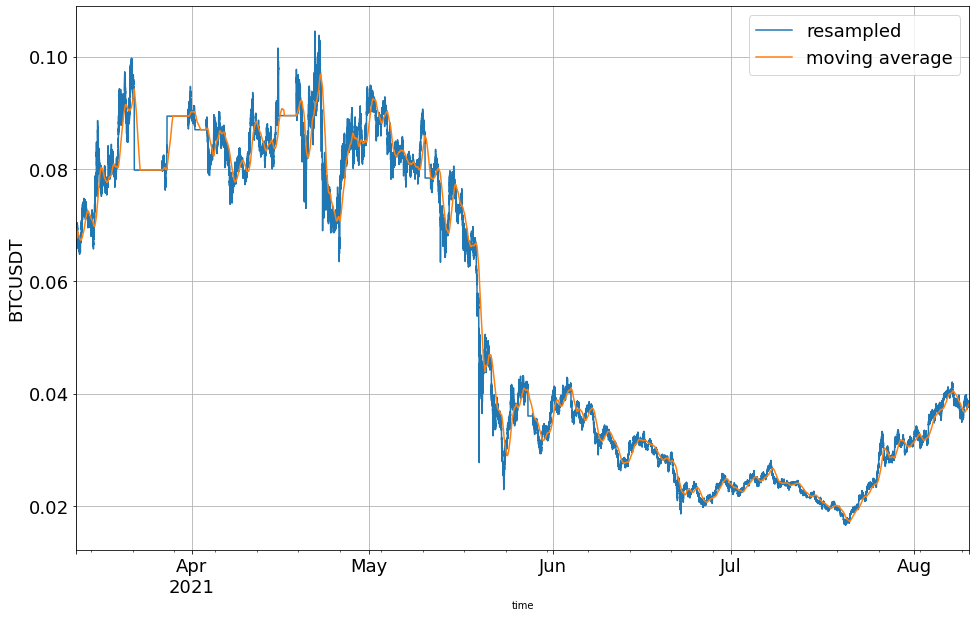

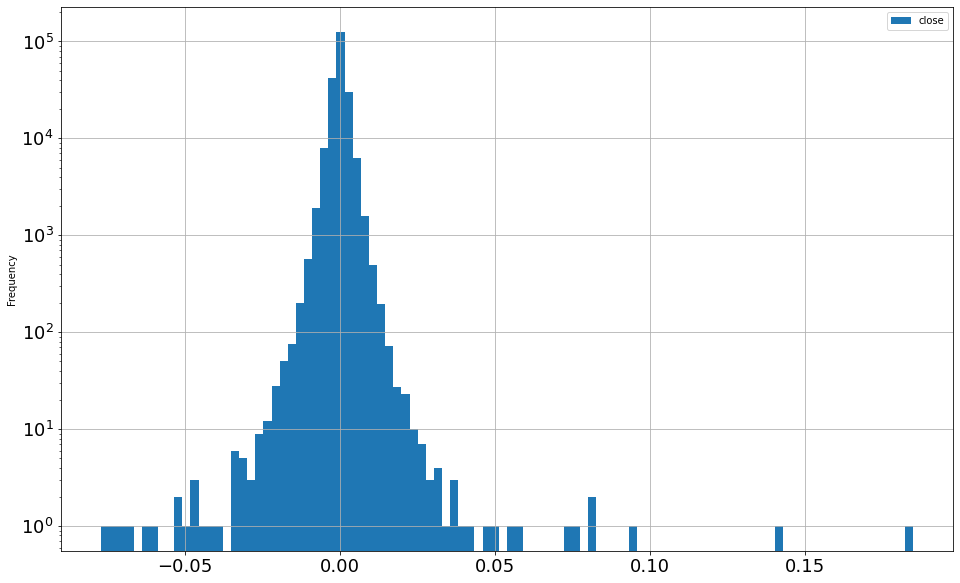

In [92]:
file = "data/example.feather"
feather = pd.read_feather(file) 

feather.index = feather.time #timestamp as index
feather = feather.close
#remove duplicated timestamps
feather = feather[~feather.index.duplicated()] 
#resamples the data to 1 min bins, keep the first value in a bin or for empty bins 
#insert the value of the next non empty bin ("backfill")
feather_resampled = feather.resample("1min").bfill() 
#compute the moving average over windows of size 5
moving_average = feather_resampled.rolling("24h").mean()
#compute the returns
returns = (feather_resampled.shift(1) / feather_resampled)-1

#plots
plot_args = {'figsize' : (16,10), 'grid' : True, 'fontsize' : 18, 'legend' : True}
from matplotlib import pyplot as plt

plt.figure() #init a new plot
feather_resampled.plot(label="resampled", **plot_args)
moving_average.plot(label="moving average", **plot_args)
plt.ylabel("BTCUSDT",fontsize=18)
plt.legend(fontsize=18)

plt.figure() #init a new plot
returns.plot(kind="hist", bins=100, **plot_args)
plt.yscale("log")